In [5]:
import pandas as pd

In [48]:
df = pd.read_csv('mock_fashion_data_uk_us.csv')

In [49]:
df.drop(['Product Name','Description', 'Review Count', 'Total Sizes', 'Purchase History', 'Fashion Magazines',
'Time Period Highest Purchase','feedback'], axis = 1, inplace = True)

In [50]:
# Ensure 'Age' is the correct data type
df['Age'] = df['Age'].astype(int)


In [51]:
# Define categorical and numerical columns
categorical_columns = ['Brand', 'Category', 'Style Attributes', 'Available Sizes', 'Color', 'Fashion Influencers', 'Season', 'Customer Reviews','Social Media Comments']
numerical_columns = ['Price', 'Age']  # Add other numerical columns if present


In [52]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 57 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   Price                                1000000 non-null  float64
 1   Rating                               1000000 non-null  float64
 2   Age                                  1000000 non-null  int32  
 3   Brand_Burberry                       1000000 non-null  bool   
 4   Brand_Calvin Klein                   1000000 non-null  bool   
 5   Brand_Jigsaw                         1000000 non-null  bool   
 6   Brand_Mulberry                       1000000 non-null  bool   
 7   Brand_Ralph Lauren                   1000000 non-null  bool   
 8   Brand_Ted Baker                      1000000 non-null  bool   
 9   Brand_Tommy Hilfiger                 1000000 non-null  bool   
 10  Category_Activewear                  1000000 non-null  bool   
 11 

In [47]:
df['Customer Reviews']

0            Mixed
1         Negative
2          Unknown
3          Neutral
4         Positive
            ...   
999995    Positive
999996     Unknown
999997     Neutral
999998    Positive
999999       Mixed
Name: Customer Reviews, Length: 1000000, dtype: object

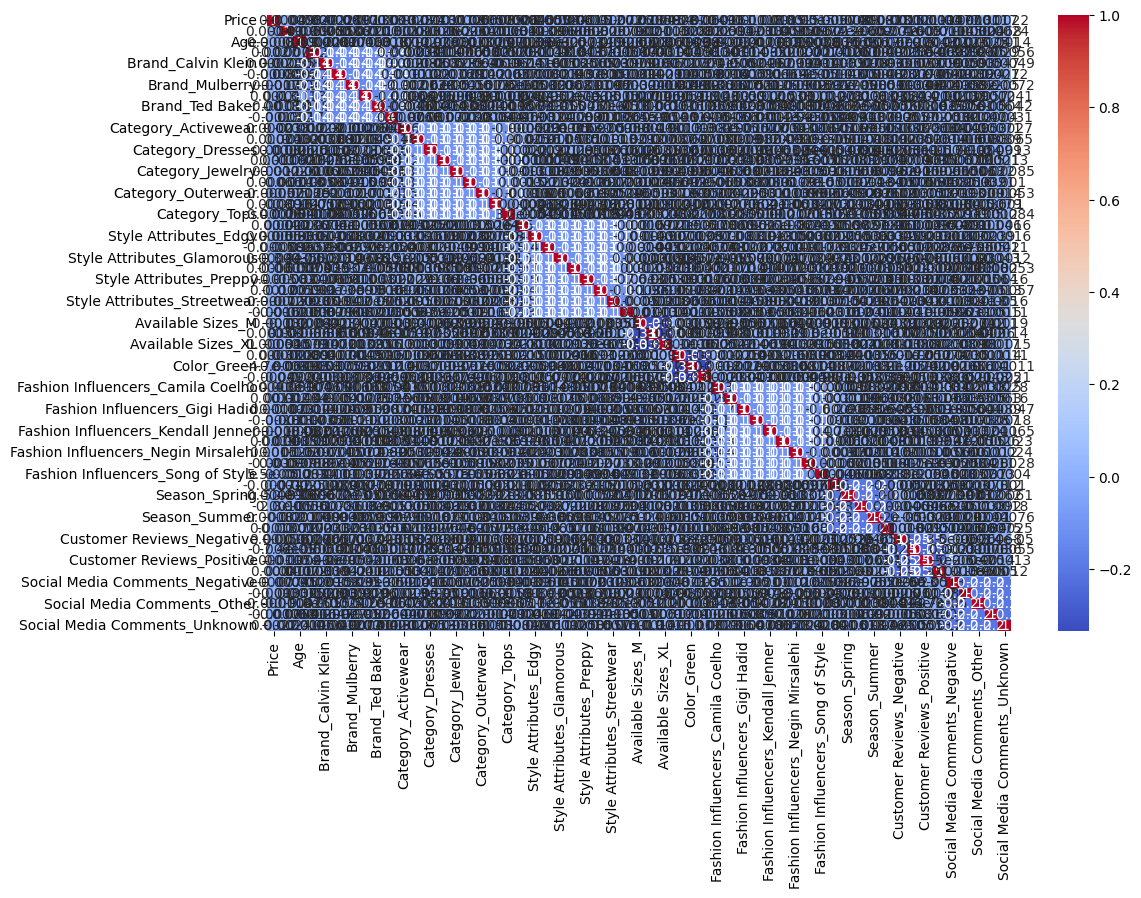

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Select features that have a high correlation with 'Rating'
correlation_threshold = 0.001  # Set threshold value
relevant_features = corr_matrix.index[abs(corr_matrix['Rating']) > correlation_threshold]
df_selected = df[relevant_features]


In [59]:
relevant_features

Index(['Rating', 'Brand_Ralph Lauren', 'Brand_Ted Baker',
       'Brand_Tommy Hilfiger', 'Category_Activewear', 'Category_Bottoms',
       'Category_Lingerie', 'Category_Outerwear', 'Category_Swimwear',
       'Style Attributes_Casual', 'Available Sizes_M', 'Available Sizes_S',
       'Available Sizes_XL', 'Color_Red',
       'Fashion Influencers_Chiara Ferragni',
       'Fashion Influencers_Julie Sariñana',
       'Fashion Influencers_Song of Style', 'Season_Fall/Winter',
       'Season_Summer', 'Customer Reviews_Negative',
       'Customer Reviews_Unknown', 'Social Media Comments_Unknown'],
      dtype='object')

In [60]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_selected.drop('Rating', axis=1)
y = df_selected['Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [64]:
X_train

,Brand_Ralph Lauren,Brand_Ted Baker,Brand_Tommy Hilfiger,Category_Activewear,Category_Bottoms,Category_Lingerie,Category_Outerwear,Category_Swimwear,Style Attributes_Casual,Available Sizes_M,...,Available Sizes_XL,Color_Red,Fashion Influencers_Chiara Ferragni,Fashion Influencers_Julie Sariñana,Fashion Influencers_Song of Style,Season_Fall/Winter,Season_Summer,Customer Reviews_Negative,Customer Reviews_Unknown,Social Media Comments_Unknown
566853,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
382311,True,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,True,False
241519,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
719220,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,True
905718,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
365838,True,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
131932,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
671155,False,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [63]:
y_pred

array([3.0002478 , 3.00624022, 2.98874612, ..., 3.00777078, 2.99501899,
       3.00491604])

In [62]:
# Calculate MSE and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.3373638005626312
R² Score: -0.0001013312986259951
